# Severity Prediction Model - Data Approach To Risk Control

# 1.0 Introduction

## 1.1 Background
#### In the last 5 years Seattle have seen increase in fatal accidents and accidents with Serius Injury. The Charts below show traffic accidents since 2014 and 2015 have increased in the number of fatalities and serius injury despite improvement that the city have from 2010. This means in the last 5 years the road is not as safe as before. If not interviene, the community will carry more and more burden from the medical cost and from loss of income to families due to disabilities and death. Insurance company may also be forced to adjust the automobile liability premium up for customer living or commuting in Seattle in which it is a lose-lose situation for both Insurance Industry and community as a whole.

###### Chart Below taken from the Seattle city GIS Collision Data

<ipython-input-1-58a8306237ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_sum["Year"] = df_col_sum["INCDATE"].astype("datetime64[ns]").dt.year
<ipython-input-1-58a8306237ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_sum["Accidents"] = 1
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

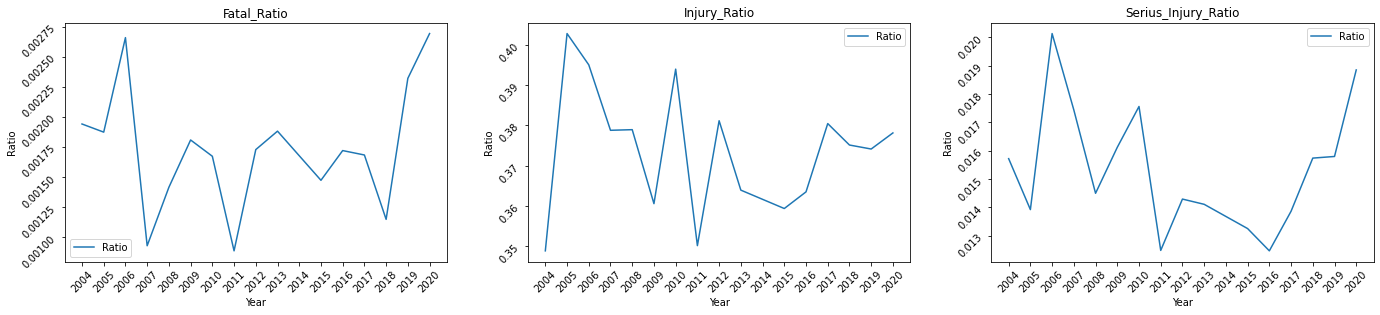

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_col = pd.read_csv('C:/Project Data/Collisions.csv')

df_col_sum = df_col[["INCDATE","INJURIES","SERIOUSINJURIES","FATALITIES"]]
df_col_sum["Year"] = df_col_sum["INCDATE"].astype("datetime64[ns]").dt.year
df_col_sum["Accidents"] = 1
df_col_sum.drop(columns=["INCDATE"], inplace=True)
df_col_sum1 = df_col_sum.groupby(["Year"]).sum()
df_col_sum1["Injury Ratio"] = df_col_sum1["INJURIES"]/df_col_sum1["Accidents"]
df_col_sum1["Serious Injury Ratio"] = df_col_sum1["SERIOUSINJURIES"]/df_col_sum1["Accidents"]
df_col_sum1["Fatality Ratio"] = df_col_sum1["FATALITIES"]/df_col_sum1["Accidents"]
df_col_sum1.reset_index(inplace=True)
df_col_sum1.drop([0,11],inplace=True)
df_col_sum1.set_index(["Year"], inplace=True)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
fig.tight_layout(pad=5.0)
ax1.plot(df_col_sum1["Fatality Ratio"], label='Ratio')
ax1.set_xlabel('Year') 
ax1.set_ylabel('Ratio')
ax1.set_title("Fatal_Ratio")
ax1.legend()
ax1.tick_params(labelrotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.plot(df_col_sum1["Injury Ratio"], label='Ratio')
ax2.set_xlabel('Year') 
ax2.set_ylabel('Ratio')
ax2.set_title("Injury_Ratio")
ax2.legend()
ax2.tick_params(labelrotation=45)
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
ax3.plot(df_col_sum1["Serious Injury Ratio"], label='Ratio')
ax3.set_xlabel('Year') 
ax3.set_ylabel('Ratio')
ax3.set_title("Serius_Injury_Ratio")
ax3.legend()
ax3.tick_params(labelrotation=45)
ax3.xaxis.set_major_locator(plt.MaxNLocator(20))

## 1.2 Problem
#### To build a model that can provide indication whether a collision accident in certain road, weather, or driver condition will involve bodily injury or worse death. Data used to build the model should include i.e. the weather condition during the accident, light condition, how the collision happened and so on.  
#### The model can then be used by city goverment to develop regulation or to build infrastructure to prevent serious injuries or fatalities.

## 1.3 Interest
#### in General the community as a whole will benefit from the exercise however, City Goverment can get more tangible benefit since the model could help to build better regulation, build more collision prenvention infrastructure in area where it needs the most, or to plan and manage better traffic management and emergency service.

# 2.0 Data Acquisition & Cleaning

### 2.1 Data Source
#### For this exercise, we will use Collision record from Seattle city GIS. The Documentation for the Data can be found [here](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf) and the link to the Data Source Is [here](https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data?geometry=-122.326%2C47.592%2C-122.318%2C47.594)
#### The Data contains all collision accidents since 2003 and it clearly describe what kind of collision, severity of the collision, what was the weather, road condition during the accident, how many vehicles involves, how many person involvoes, degree of injury, etc.. However not all feature of the data are usefull for to provide indication to an accident.

#### The next Section, the Preliminary Data Cleaning, we will focus on identifying feature that can be used to build model.

### 2.2 Preliminary Data Cleansing
#### Upon Examination we have found out that the Seatle GIS Data is unique that all rows indicate single collision accident without duplicates.

In [2]:
print('Original Data Shape :', df_col.shape)
df_col1 = df_col.drop_duplicates()
print('Unique Data Shape :',df_col1.shape)

Original Data Shape : (221389, 40)
Unique Data Shape : (221389, 40)


#### However features that only have one level will be omitted since they won't contribute to the model. They are:

In [3]:
df_col_desc = pd.DataFrame(df_col.nunique(),columns=['Level'])
df_col_desc.sort_values(by=['Level']).head(4)

,Level
INATTENTIONIND,1
SPEEDING,1
PEDROWNOTGRNT,1
EXCEPTRSNDESC,1


#### Upon further Examination we found out there are 3 features below that only have 2 levels however, one of them which 'EXCEPTRSNCODE' will be ommitted due to Not Enough Information. 

In [4]:
df_col_desc = pd.DataFrame(df_col.nunique(),columns=['Level'])
df_col_desc.sort_values(by=['Level']).iloc[4:7, 0:1]

,Level
EXCEPTRSNCODE,2
STATUS,2
HITPARKEDCAR,2


In [6]:
df_col_EXCEPTRSNCODE = pd.DataFrame(df_col.groupby(['EXCEPTRSNCODE'])['EXCEPTRSNCODE'].value_counts())
df_col_EXCEPTRSNCODE.head()

,,EXCEPTRSNCODE
EXCEPTRSNCODE,EXCEPTRSNCODE,
,,89207
NEI,NEI,11779


#### Other features below such as 'REPORTNO', 'INCKEY','OBJECTID', 'COLDETKEY','SDOTCOLNUM' are ommited because they are the Unique record identifier which don't carry information on how/ when/ what collision.

In [13]:
df_col_desc = pd.DataFrame(df_col.nunique(),columns=['Level'])
df_col_desc.sort_values(by=['Level']).iloc[34:40, 0:1]

,Level
SDOTCOLNUM,127186
INCDTTM,169519
REPORTNO,221386
INCKEY,221389
OBJECTID,221389
COLDETKEY,221389


#### Features below are not included because they represent the magnitude of the incident and not the probability of the severe accident (accident where poeple died). 
- PERSONCOUNT (The total number of people involved in the collision).
- PEDCOUNT (The number of pedestrians involved in the collision).
- PEDCYLCOUNT (The number of bicycles involved in the collision).
- VEHCOUNT (The number of vehicles involved in the collision).
- INJURIES (The number of total injuries in the collision). 
- SERIOUSINJURIES (The number of serious injuries in the collision).
- FATALITIES (The number of fatalities in the collision)

#### Features below also not inlcuded since they act as description to an existing codes:
- SEVERITYDESC description of SEVERITYCODE 
- SDOT_COLDESC description of SDOT_COLCODE
- ST_COLDESC description of ST_COLCODE	

#### and Features below  are not inlcuded since they act as pointer to the collision location but not the feature of the location:
- X
- Y
- INTKEY
- LOCATION
- SEGLANEKEY
- CROSSWALKKEY

### 2.3 Feature Selection

#### After understanding the meaning of each feature, 10 features will be used as independent variables to SEVERITYCODE. They Are: 
- ADDRTYPE : 
 - simple classification of the accident location 'Alley','Block','Intersection'.
- COLLISIONTYPE :
 - Describe how the collision happen such as collision at an angle, involving, cyclist, head on collision, etc.   
- JUNCTIONTYPE :
 - Describe the nature of the junction such as at intersection but not related to intersection, at mid-block but intersection related, at ramp junction, etc. 
- SDOT_COLCODE :
 - This is set of code define by Seattle's Department of Transportation that clearly define the nature of the collision. for example, it has specific code for collission where a motor vehicle hit a cyclist head on, or whether a motor vehicle rear-ended another vehicle. this feature will be intrumental in deterimining bodily injury in a collision.
- ST_COLCODE :
 - Similar to SDOT_COLCODE,this collision code prescribed by State Goverment.
- UNDERINFL :
 - This is boolean feature that describe whether the driver is under influence (alcohol or any other substence) while driving.
- ROADCOND :
 - This feature describe the road condition during the accident whether it was wet, has show on it, dry, has sand or dirt etc.
- WEATHER :
 - Describe the weather during the accident, whether it was raining, has smoke or smog, overcast, etc.
- LIGHTCOND :
 - Describe the light condition during the accident, whether it was Dark with street light, completely dark, day light, etc.
- HITPARKEDCAR :
 - This is boolean feature that describe whether the accident involves hitting a parked car.
- INCDTTM :
 - this the incident date information, for the model we would like to see how weekdays or weekend affects the severity of the collision.

#### As for the target label we will use
- SEVERITYCODE but transformed to simplify the non Bodily injury code where all non bodily injury and death are mapped to '0'.

#### Instead of the original feature, we will work with the numerical version of each feature as shown below.

In [37]:
# Re-mapping categorical features
df_col['ADDRTYPE_1'] = df_col['ADDRTYPE'].fillna('Block').replace(['Alley','Block','Intersection'],['0','1','2']).astype('float64')
df_col['COLLISIONTYPE_1'] = df_col['COLLISIONTYPE'].fillna('Other').replace(['Angles','Cycles','Head On','Left Turn','Other','Parked Car','Pedestrian','Rear Ended','Right Turn','Sideswipe'],['0','1','2','3','4','5','6','7','8','9']).astype('float64')
df_col['JUNCTIONTYPE_1'] = df_col['JUNCTIONTYPE'].fillna('Unknown').replace(['At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)','Ramp Junction','Unknown'],['0','1','2','3','4','5','6']).astype('float64')
df_col['SDOT_COLCODE_1'] = df_col['SDOT_COLCODE'].fillna('0.0').astype('float64')
df_col['ST_COLCODE_1'] = df_col['ST_COLCODE'].replace(r'\s+', np.nan, regex=True).fillna('0.0')
df_col['ST_COLCODE_1_1'] = df_col['ST_COLCODE_1'].astype('float64')
df_col['UNDERINFL_1'] = df_col['UNDERINFL'].fillna('0').replace(['N','Y'],['0','1']).astype('float64')
df_col['ROADCOND_1'] = df_col['ROADCOND'].fillna('Unknown').replace(['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'],['0','1','2','3','4','5','6','7','8']).astype('float64')
df_col['LIGHTCOND_1'] = df_col['LIGHTCOND'].fillna('Unknown').replace(['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'],['0','1','2','3','4','5','6','7','8']).astype('float64')
df_col['HITPARKEDCAR_1'] = df_col['HITPARKEDCAR'].fillna('N').replace(['N','Y'],['0','1']).astype('float64')
df_col['WEATHER_1'] = df_col['WEATHER'].fillna('Unknown').replace(['Blowing Sand/Dirt','Blowing Snow','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'],['0','1','2','3','4','5','6','7','8','9','10','11']).astype('float64')
df_col['INCDTTM_1'] = df_col['INCDTTM'].astype("datetime64[ns]").dt.dayofweek.apply(lambda x: 1 if (x>3)  else 0)

In [38]:
# Re-mapping target labels
df_col['SEVERITYCODE_1']=df_col['SEVERITYCODE'].fillna('0').replace(['0','1','2','2b','3'],['0','0','1','2','3']).astype('float64')
df_col['SEVERITYDESC_1']=df_col['SEVERITYDESC'].fillna('Unknown').replace(['Unknown','Property Damage Only Collision','Injury Collision','Serious Injury Collision','Fatality Collision'],['Other','Other','Other','Serious Injury','Fatal'])

#### To evaluate the features correlation with the target label as well as intercorrelation between features, Pearson Correlation exercise and heat map chart are used. The analysis indicates:
- Relatively Low correlation between 'SEVERITYCODE' and the features, the highest correlation score is 24.3% which is quite low. however,
- Heat map examination reveals that not all features are significantly intercorrelated with each other which suggest that the features are not redudant. except for Weather, Light Condition & road condition. this finding is anticipated thus weather does affect road condition and light condition. therefore weather will be omitted from the model.
- Incident Date (day of the week) feature is proven to be very uninstrumental with less then 1% correlation. thus Incident Date feature will be droped from the exercise

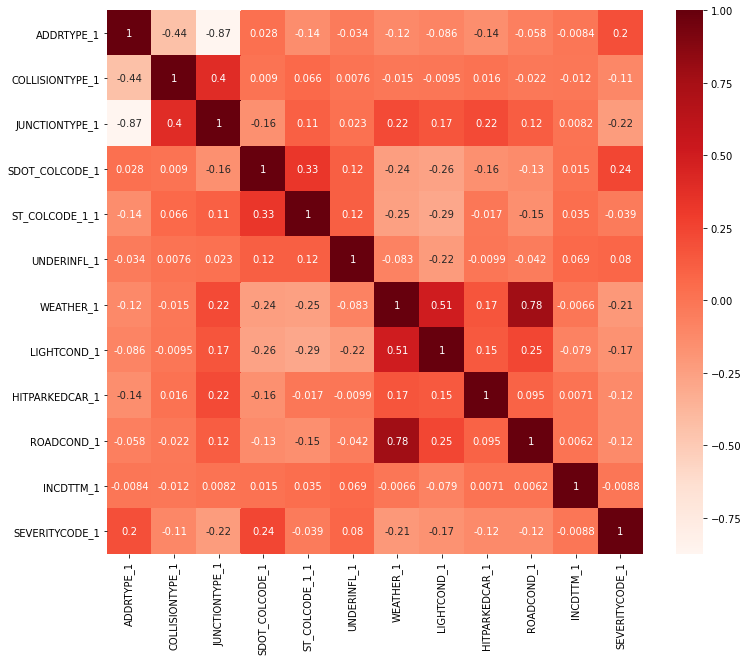

In [39]:
#Pearson Correlation
df_col_test = df_col[['ADDRTYPE_1','COLLISIONTYPE_1','JUNCTIONTYPE_1','SDOT_COLCODE_1','ST_COLCODE_1_1','UNDERINFL_1','WEATHER_1','LIGHTCOND_1','HITPARKEDCAR_1','ROADCOND_1','INCDTTM_1','SEVERITYCODE_1']]
plt.figure(figsize=(12,10))
cor = df_col_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [40]:
#Correlation with label
cor_target = pd.DataFrame(abs(cor['SEVERITYCODE_1']))
cor_target.sort_values(by=['SEVERITYCODE_1'],ascending=False)

,SEVERITYCODE_1
SEVERITYCODE_1,1.000000
SDOT_COLCODE_1,0.243995
JUNCTIONTYPE_1,0.224267
WEATHER_1,0.205072
ADDRTYPE_1,0.199551
LIGHTCOND_1,0.167100
HITPARKEDCAR_1,0.122408
ROADCOND_1,0.120879
COLLISIONTYPE_1,0.111033
UNDERINFL_1,0.080007


#### the correlation exercise resulted in leaner set of predictive variables of X that will be used to build the model. they are:
- ADDRTYPE
- COLLISIONTYPE  
- JUNCTIONTYPE
- SDOT_COLCODE
- ST_COLCODE
- UNDERINFL
- ROADCOND
- LIGHTCOND
- HITPARKEDCAR